<a href="https://colab.research.google.com/github/Alwaleed-it/Phthon/blob/main/feature_engineering_dataset_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libarary**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# **Read dataset**

In [ ]:
df = pd.read_csv('/content/feature_engineering_dataset.csv')

# **Data Discovery**

In [ ]:
print("="*50)
print("البيانات الأولية")
print("="*50)
print(f"عدد الصفوف: {df.shape[0]}, عدد الأعمدة: {df.shape[1]}")
print("\nعينة من البيانات:")
print(df.head(3))
print("\nمعلومات أنواع البيانات:")
print(df.dtypes)
print("\nالقيم الفريدة في كل عمود:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} قيم فريدة")

البيانات الأولية
عدد الصفوف: 10000, عدد الأعمدة: 7

عينة من البيانات:
  customer_id  age  gender monthly_spend membership_years region  churn
0   CUST00001   60  Female        438.20               12  South      1
1   CUST00002  NaN  Female        367.73                7  North      1
2   CUST00003   43    Male           NaN               14   East      1

معلومات أنواع البيانات:
customer_id         object
age                 object
gender              object
monthly_spend       object
membership_years    object
region              object
churn                int64
dtype: object

القيم الفريدة في كل عمود:
customer_id: 10000 قيم فريدة
age: 54 قيم فريدة
gender: 6 قيم فريدة
monthly_spend: 5205 قيم فريدة
membership_years: 18 قيم فريدة
region: 9 قيم فريدة
churn: 2 قيم فريدة


# **Preprocessing**

In [ ]:
print("\n" + "="*50)
print("معالجة البيانات")
print("="*50)

# تحويل الأعمدة إلى الأنواع الصحيحة
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['monthly_spend'] = pd.to_numeric(df['monthly_spend'], errors='coerce')
df['membership_years'] = pd.to_numeric(df['membership_years'], errors='coerce')

# معالجة القيم المفقودة
print("\nالقيم المفقودة قبل المعالجة:")
print(df.isnull().sum())

# ملء القيم المفقودة
df['age'].fillna(df['age'].median(), inplace=True)
df['monthly_spend'].fillna(df['monthly_spend'].median(), inplace=True)
df['membership_years'].fillna(df['membership_years'].median(), inplace=True)
df['gender'].fillna('Unknown', inplace=True)
df['region'].fillna('Unknown', inplace=True)

# معالجة القيم الشاذة
def handle_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

for col in ['age', 'monthly_spend', 'membership_years']:
    df = handle_outliers(df, col)

# تنظيف عمود المنطقة
df['region'] = df['region'].str.strip().str.title()
df['region'] = df['region'].replace({
    'South': 'South', 'North': 'North', 'East': 'East', 'West': 'West',
    '?': 'Unknown', 'N': 'North', 'Eest': 'East', 'So': 'South'
})
df['region'] = df['region'].fillna('Unknown')


معالجة البيانات

القيم المفقودة قبل المعالجة:
customer_id            0
age                 2000
gender               640
monthly_spend       2000
membership_years    1318
region               631
churn                  0
dtype: int64


<ipython-input-5-543110f5163b>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
<ipython-input-5-543110f5163b>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

# **Separate Numerical and Categorical**

In [ ]:
print("\n" + "="*50)
print("تحليل البيانات (EDA)")
print("="*50)

# فصل المتغيرات الرقمية والفئوية
numerical_cols = ['age', 'monthly_spend', 'membership_years']
categorical_cols = ['gender', 'region']
target_col = 'churn'
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print("\n🔢 Numerical Features:", numerical_cols)
print("🔠 Categorical Features:", categorical_cols)


تحليل البيانات (EDA)

🔢 Numerical Features: ['age', 'monthly_spend', 'membership_years', 'churn']
🔠 Categorical Features: ['customer_id', 'gender', 'region']


# **Univariate Analysis**


أ. التحليل الأحادي (Univariate Analysis)


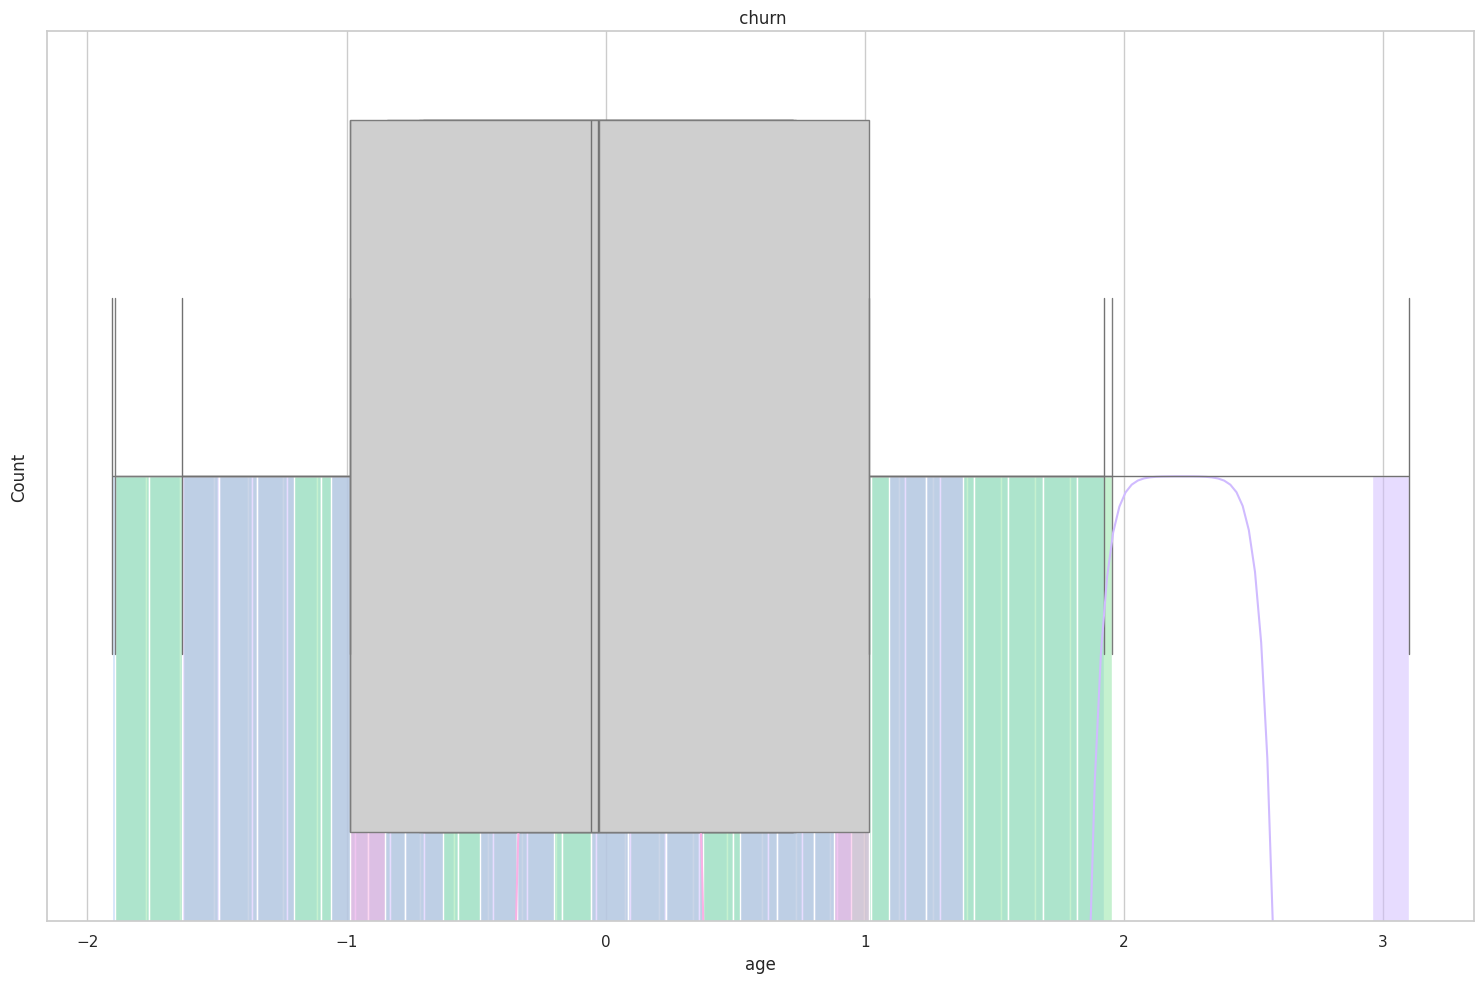

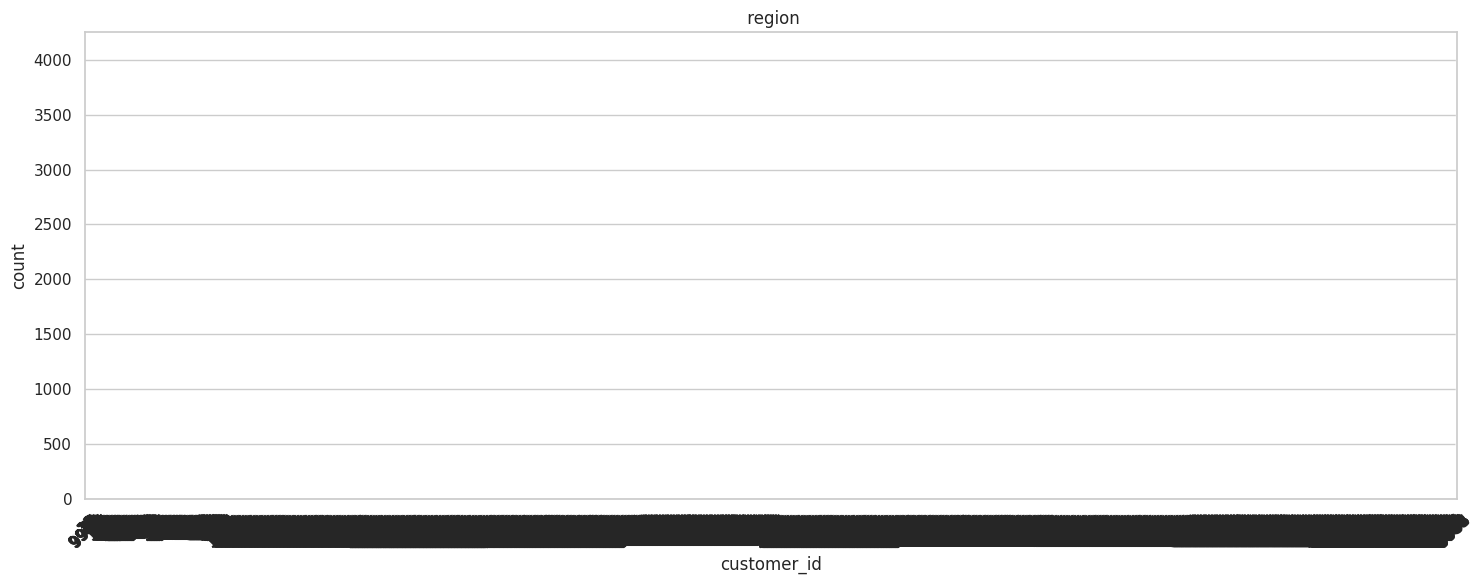

In [ ]:
#(Univariate Analysis)
print("\nأ. التحليل الأحادي (Univariate Analysis)")

# للبيانات الرقمية
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):

    sns.histplot(df[col], kde=True)
    plt.title(f' {col}')

    sns.boxplot(x=df[col])
    plt.title(f' {col}')
plt.tight_layout()
plt.show()

# للبيانات الفئوية
plt.figure(figsize=(15, 6))
for i, col in enumerate(categorical_cols, 1):

    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f' {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Bivariate Analysis**


ب. التحليل الثنائي (Bivariate Analysis)


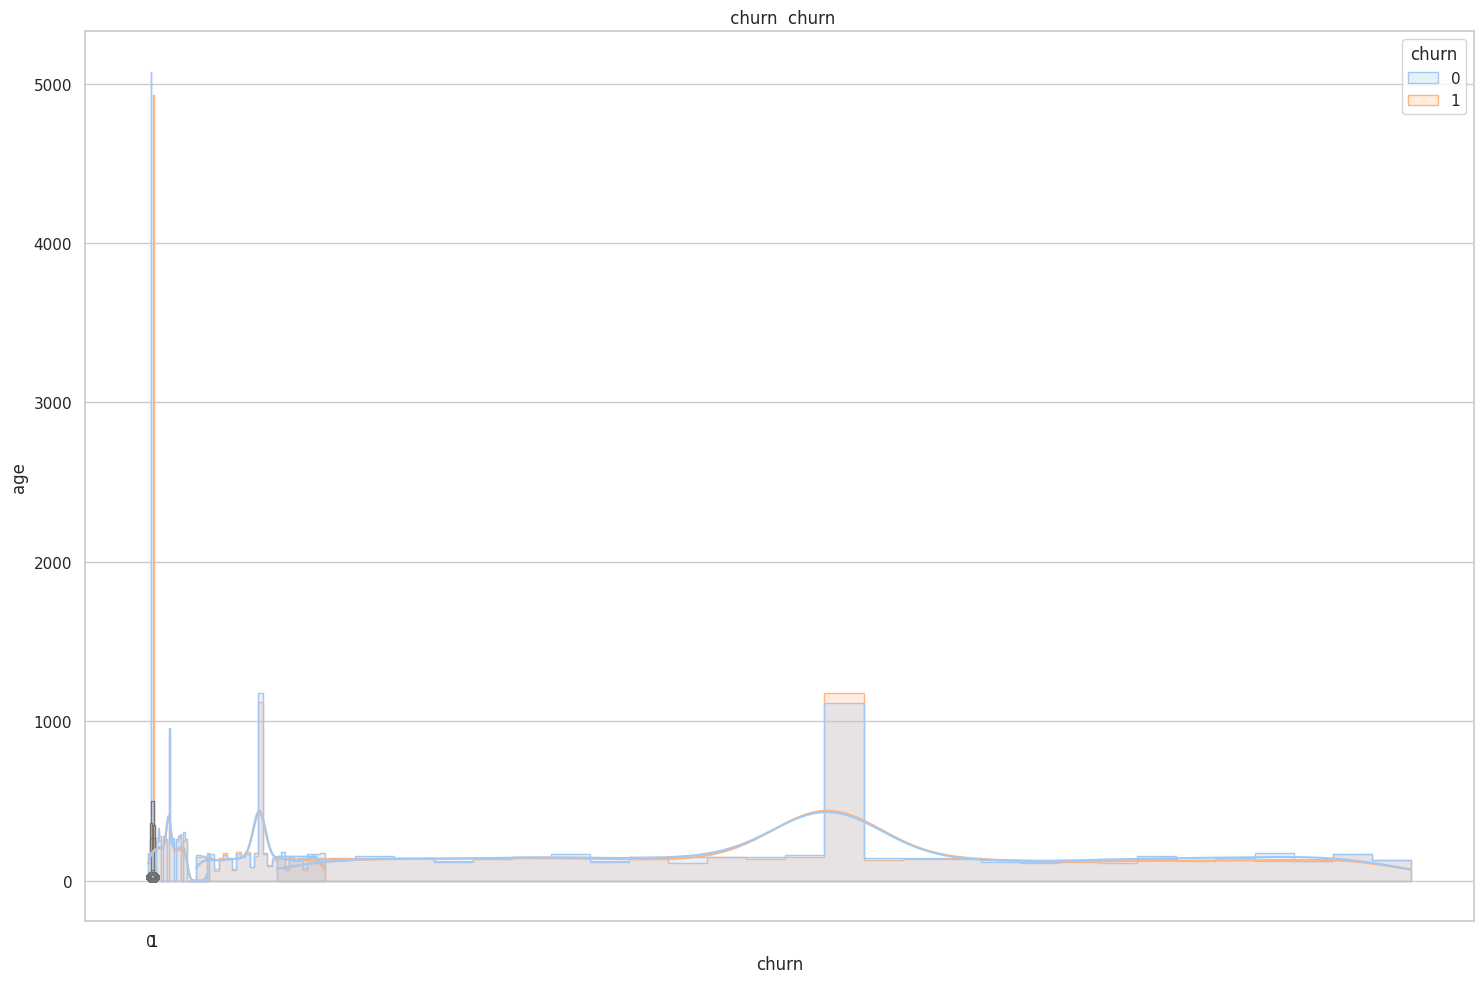

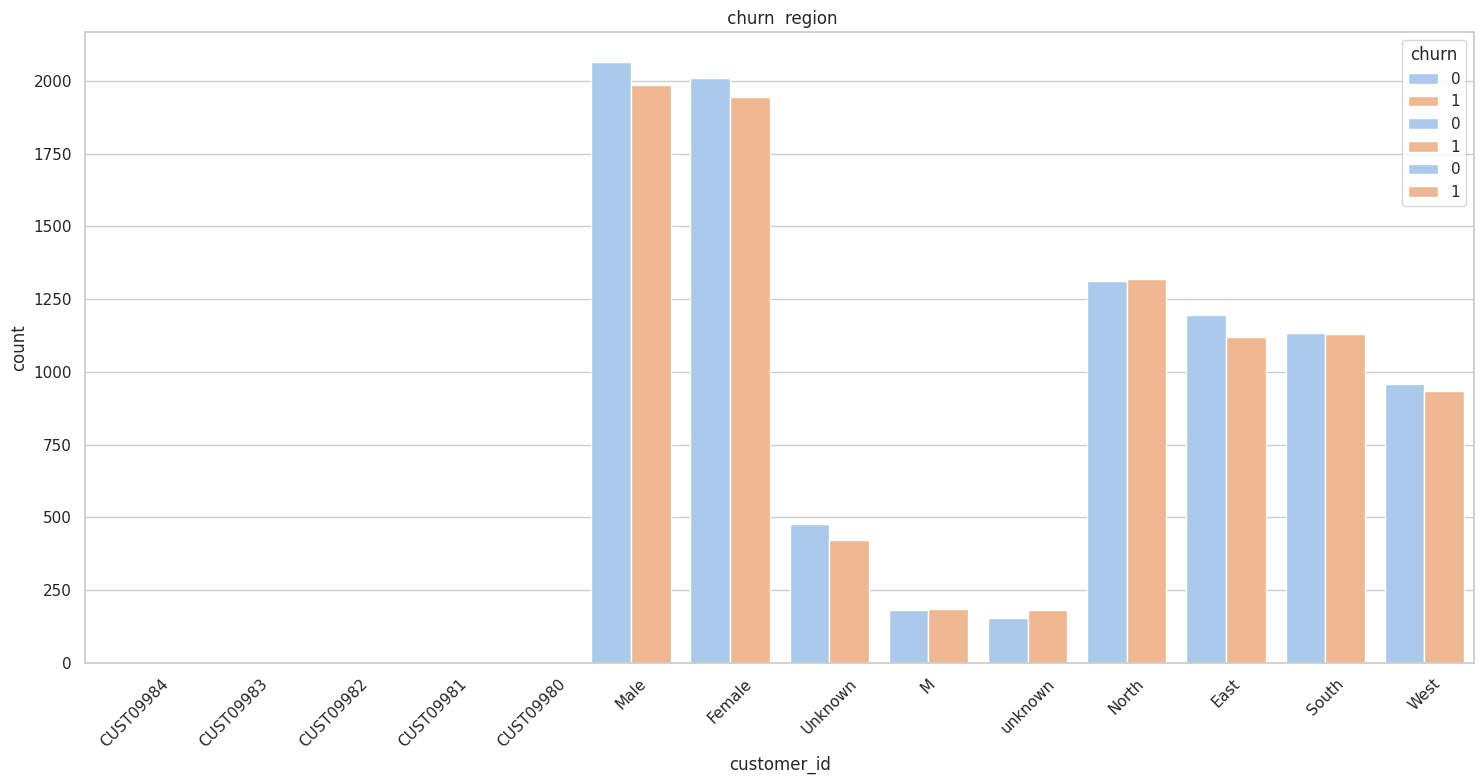

In [ ]:
# ب. التحليل الثنائي (Bivariate Analysis)
print("\nب. التحليل الثنائي (Bivariate Analysis)")

# العلاقة بين المتغيرات الرقمية والمتغير الهدف
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):

    sns.boxplot(x=target_col, y=col, data=df)
    plt.title(f'{col}  {target_col}')

    sns.histplot(data=df, x=col, hue=target_col, kde=True, element='step')
    plt.title(f' {col}  {target_col}')
plt.tight_layout()
plt.show()

# العلاقة بين المتغيرات الفئوية والمتغير الهدف
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_cols, 1):

    sns.countplot(data=df, x=col, hue=target_col, order=df[col].value_counts().index[:5])
    plt.title(f' {target_col}  {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Multivariate Analysis**


ج. التحليل المتعدد (Multivariate Analysis)


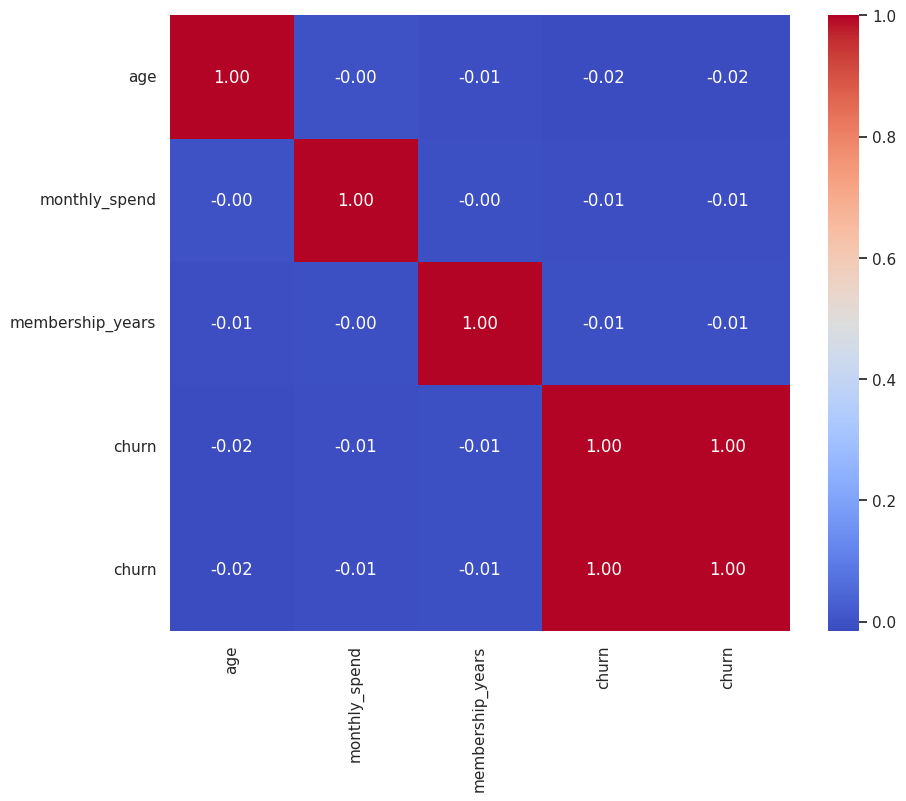

<Figure size 1200x800 with 0 Axes>


المعالجة المسبقة (Preprocessing)
  customer_id: {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5), np.int64(6): np.int64(6), np.int64(7): np.int64(7), np.int64(8): np.int64(8), np.int64(9): np.int64(9), np.int64(10): np.int64(10), np.int64(11): np.int64(11), np.int64(12): np.int64(12), np.int64(13): np.int64(13), np.int64(14): np.int64(14), np.int64(15): np.int64(15), np.int64(16): np.int64(16), np.int64(17): np.int64(17), np.int64(18): np.int64(18), np.int64(19): np.int64(19), np.int64(20): np.int64(20), np.int64(21): np.int64(21), np.int64(22): np.int64(22), np.int64(23): np.int64(23), np.int64(24): np.int64(24), np.int64(25): np.int64(25), np.int64(26): np.int64(26), np.int64(27): np.int64(27), np.int64(28): np.int64(28), np.int64(29): np.int64(29), np.int64(30): np.int64(30), np.int64(31): np.int64(31), np.int64(32): np.int64(32), np.int64(33): np.int64(33), np.int64(34): np.i

In [ ]:
# ج. التحليل المتعدد (Multivariate Analysis)
print("\nج. التحليل المتعدد (Multivariate Analysis)")

# مصفوفة الارتباط
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols + [target_col]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

# علاقات متعددة المتغيرات

plt.suptitle('تحليل العلاقات المتعددة', y=1.02)
plt.show()

# 4. المعالجة المسبقة (Preprocessing)
print("\n" + "="*50)
print("المعالجة المسبقة (Preprocessing)")
print("="*50)

# ترميز المتغيرات الفئوية
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"  {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# قياس البيانات الرقمية
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# النتيجة النهائية
print("\nالبيانات بعد المعالجة:")
print(df.head())
print("\nملخص الإحصائيات:")
print(df.describe())